In [26]:
import pandas as pd
import glob


In [27]:
files = glob.glob("./data/20221221/coil1000-z_4_0-x_0_0-sensor2/voltage_*.csv")
files

['./data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-04-56.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-02.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-06.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-12.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-15.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-17.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-21.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-26.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-30.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-35.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-39.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-44.csv',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor2\\voltage_14-05-48.csv']

In [28]:
dfs = [
    pd.read_csv(file).set_index("time").rename(columns={"V": f"{idx * 5}V"}) for idx, file in enumerate(files)
]
df = pd.concat(dfs, axis=1)

In [29]:
base = df.query("time > 0.002")
base.mean()

0V     3.999618
5V     3.999844
10V    3.999736
15V    3.999615
20V    3.999747
25V    3.999491
30V    3.999367
35V    3.999239
40V    3.999196
45V    3.999373
50V    3.999241
55V    3.999255
60V    3.999090
dtype: float64

In [30]:
bfield = (df.max() - base.mean()) * 100
bfield

0V      0.173495
5V      1.630771
10V     3.318762
15V     5.008038
20V     6.606197
25V     8.309011
30V     9.998561
35V    11.655688
40V    13.008308
45V    13.944261
50V    14.746750
55V    15.435930
60V    15.978572
dtype: float64

<AxesSubplot:>

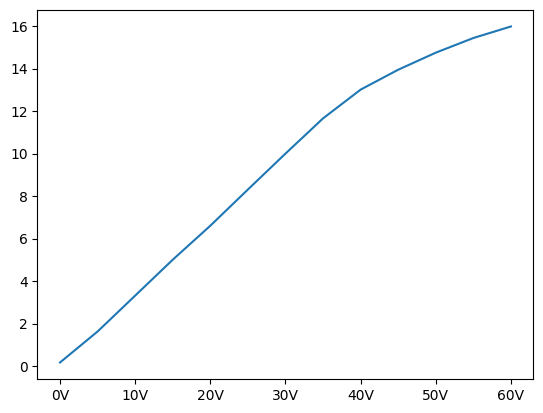

In [31]:
bfield.plot()

In [14]:
sensornum = 5
paths1 = [
    f"./data/20221221/coil1000-z_{n}_0-x_0_0-sensor{sensornum}/"
    for n in range(0,7)
]
paths2 = [
    f"./data/20221221/coil1000-z_{n}_5-x_0_0-sensor{sensornum}/"
    for n in range(0,6)
]
paths = paths1 + paths2
paths

['./data/20221221/coil1000-z_0_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_1_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_2_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_3_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_4_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_5_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_6_0-x_0_0-sensor5/',
 './data/20221221/coil1000-z_0_5-x_0_0-sensor5/',
 './data/20221221/coil1000-z_1_5-x_0_0-sensor5/',
 './data/20221221/coil1000-z_2_5-x_0_0-sensor5/',
 './data/20221221/coil1000-z_3_5-x_0_0-sensor5/',
 './data/20221221/coil1000-z_4_5-x_0_0-sensor5/',
 './data/20221221/coil1000-z_5_5-x_0_0-sensor5/']

In [16]:
import os
for path in paths:
    os.mkdir(path)